**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset:**

The dataset has the following features:

**User_ID:**	User ID

**Product_ID:**	Product ID

**Gender:**	Sex of User

**Age:**	Age in bins

**Occupation:**	Occupation(Masked)

**City_Category:**	Category of the City (A,B,C)

**StayInCurrentCityYears:**	Number of years stay in current city

**Marital_Status:**	Marital Status

**ProductCategory:**	Product Category (Masked)

**Purchase:**	Purchase Amount

**IMPORTING DATASET AND RELEVANT LIBRARIES**

In [3]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [4]:
# reading the Dataset
df=pd.read_csv("walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


**SHAPE OF DATA**

In [5]:
# Analysing the Shape of our Dataset
print(df.shape)
print(df.columns)

(550068, 10)
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


The Dataset Contains 550068 Rows and 10 Columns.
The Columns of the dataset are as follows:
User_ID, Product, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category and Purchase.

In [6]:
#Understanding the Data Types of the Attributes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

The Data Types of the Attributes in the given Dataframe are integers(int64) Objects.

In [7]:
#Converting the required attributes to categorical one:
for col in ['User_ID','Product_ID','Age','Gender','City_Category', 'Product_Category','Marital_Status','Product_Category','Stay_In_Current_City_Years','Occupation']:
  df[col]=df[col].astype('category')
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

Apart from Purchase, all the other Attributes seem to be categorical and discrete.

**MISSING VALUE DETECTION**

In [8]:
#Checking for null values for each attributes
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There is no null or empty values present in our dataset.

**STATISTICAL SUMMARY OF DATA**

In [9]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


Each Column have been Statistically summarized in terms of number of occurences, number of unique values, most occuring element and its frequency, etc. There are 5891 unique user ids, 3631 unique product ids, 7 Age categories, 21 Occupation categories, 3 City Categories, 20 Product categories and 5 Categories in Stay_In_Current_City_Years column.

**Non-Graphical Analysis**

In [10]:
# Undertaking basic Non-Graphical Analysis
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

There are 1666 Female Customers and 4225 Male Customers during Black Friday.

In [11]:
df.groupby('Age')['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

Most of the customers lie within the age group of 26 to 35 years old.

In [12]:
round(df['Purchase'].mean(),2)

9263.97

The average purchase amount in the black friday sale seem to be 9263.97 dollars.

In [13]:
df.groupby('City_Category')['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

Most of the customers are from Cities with Category C.

In [14]:
df.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

Most customers tend to be not married.

**VISUAL ANALYSIS**

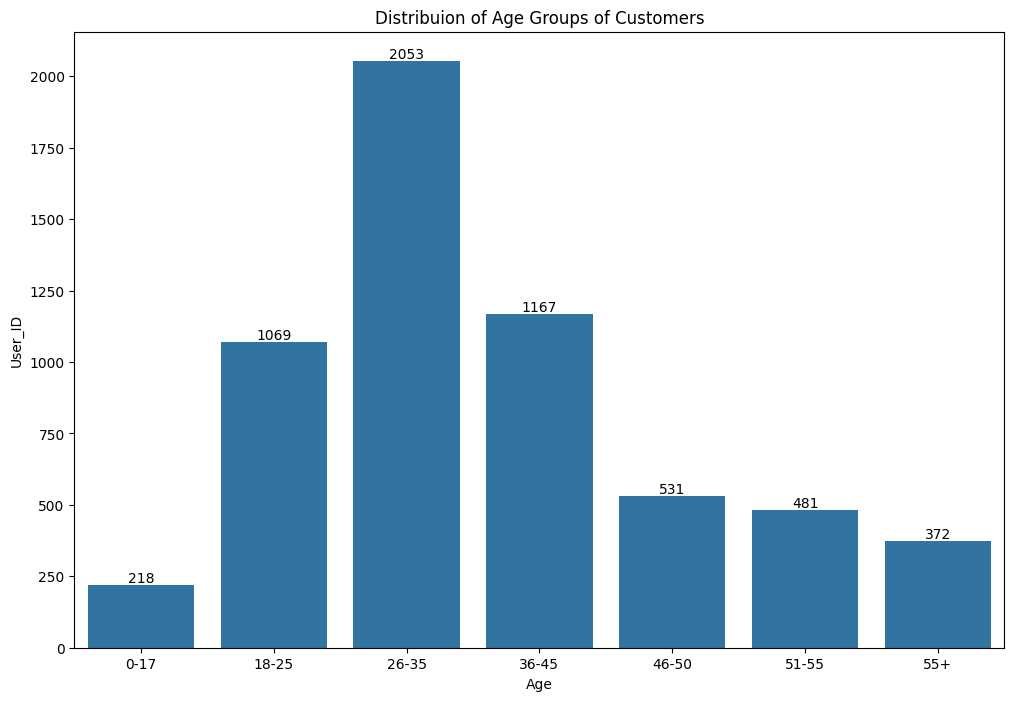

In [28]:
#Attempting to understand the attributes of the customers
plt.figure(figsize=(12,8))
df_age=df.groupby('Age')['User_ID'].nunique()
ax=sns.barplot(df_age)
ax.bar_label(ax.containers[0])
plt.title("Distribuion of Age Groups of Customers")
plt.show()

Most of the customers tend to be in age group of 26 to 30. Least amount of customers are seen in age group of 0 to 17.

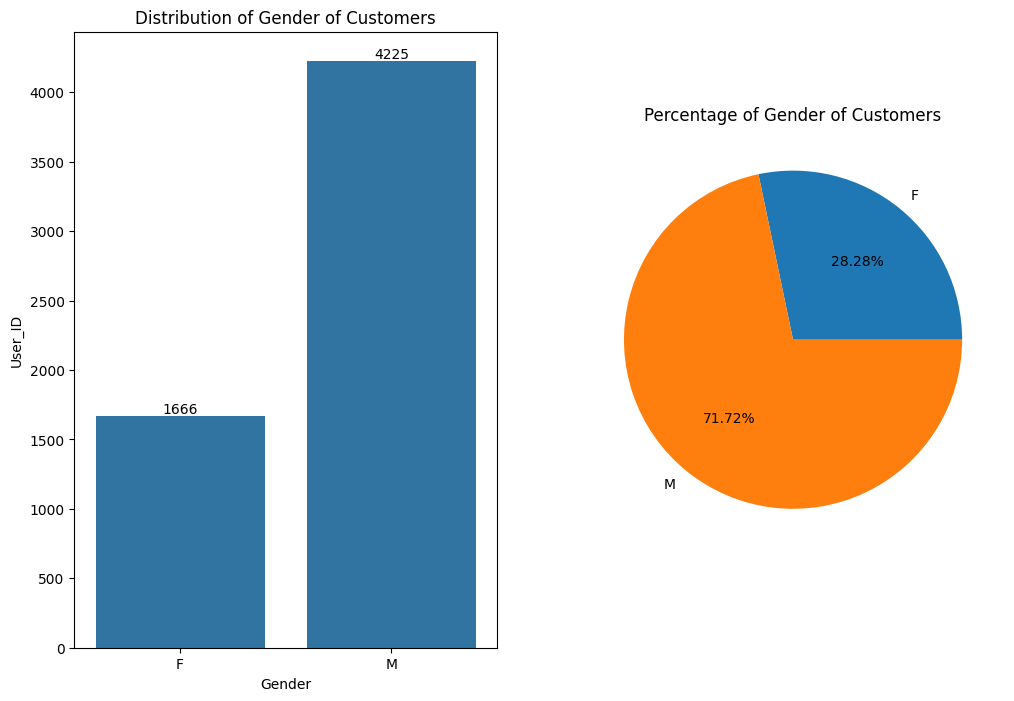

In [27]:
plt.figure(figsize=(12,8))
df_gender=df.groupby('Gender')['User_ID'].nunique()
plt.subplot(1,2,1)
ax=sns.barplot(df_gender)
ax.bar_label(ax.containers[0])
plt.title("Distribution of Gender of Customers")
plt.subplot(1,2,2)
plt.pie(df_gender,labels=df_gender.index,autopct="%.2f%%")
plt.title("Percentage of Gender of Customers")
plt.show()

71.72 % of Male customers and 28.28 % of Female customers are seen in the given sample. Most of the customers are Male.

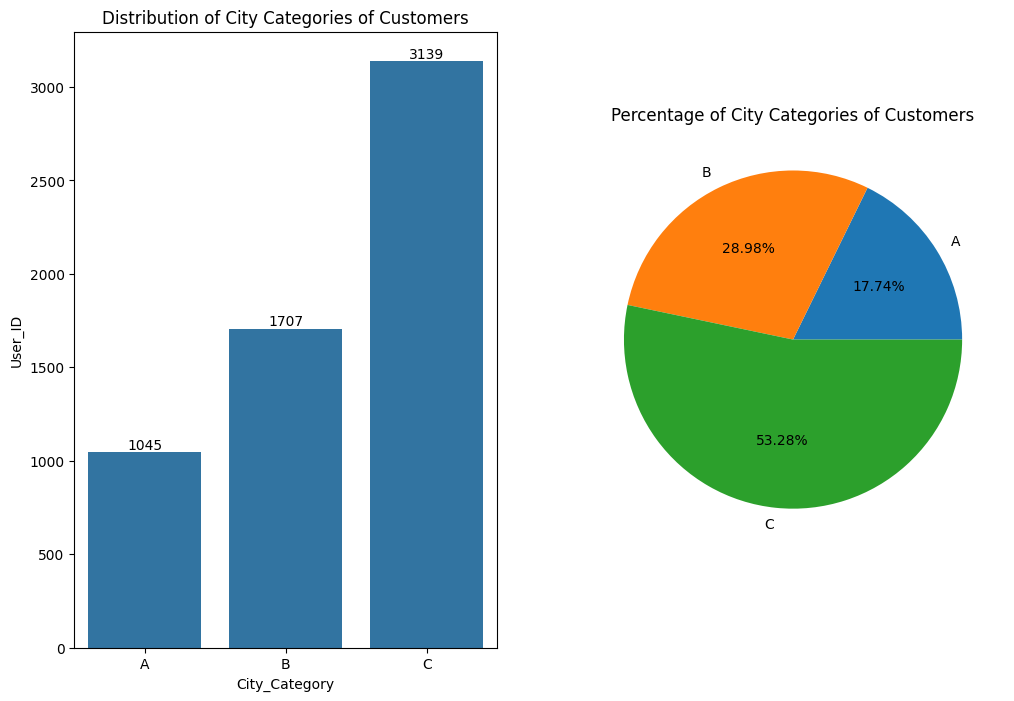

In [23]:
plt.figure(figsize=(12,8))
df_City=df.groupby("City_Category")['User_ID'].nunique()
plt.subplot(1,2,1)
ax=sns.barplot(df_City)
ax.bar_label(ax.containers[0])
plt.title("Distribution of City Categories of Customers")
plt.subplot(1,2,2)
plt.pie(df_City,labels=df_City.index,autopct="%.2f%%")
plt.title("Percentage of City Categories of Customers")
plt.show()

53.28 % of the customers stay in Category C Cities, 28.98 % of the customers stay in Category B Cities and 17.74 % of the customers stay in Category A Cities. Most of the customers from the sample are from Category C cities.

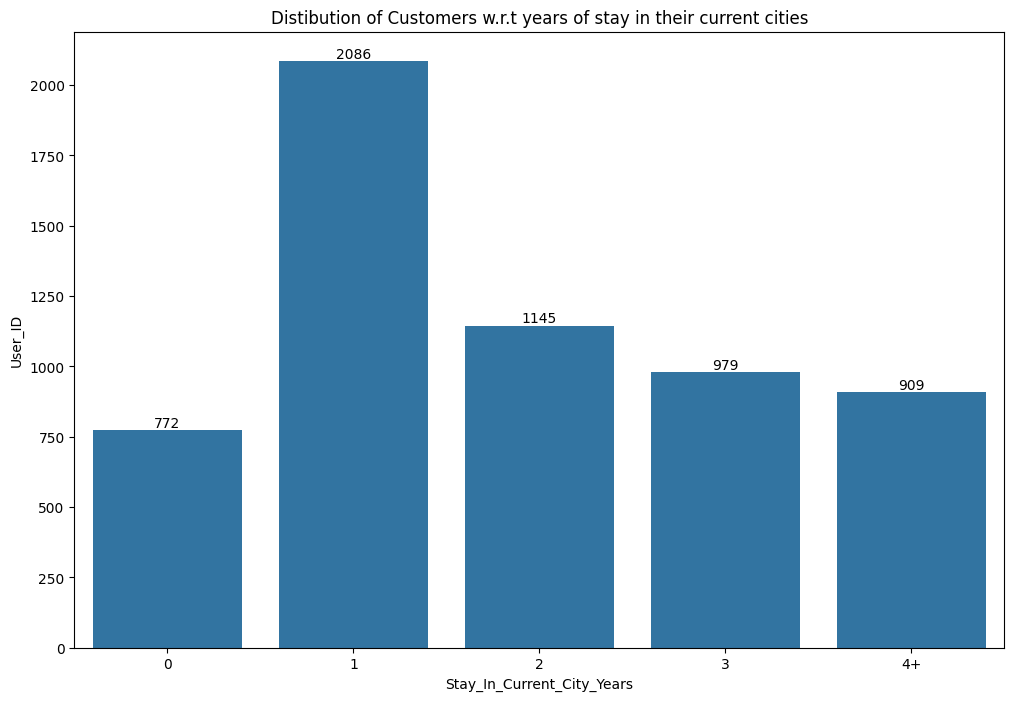

In [26]:
plt.figure(figsize=(12,8))
df_stay=df.groupby('Stay_In_Current_City_Years')['User_ID'].nunique()
plt.title("Distibution of Customers w.r.t years of stay in their current cities")
ax=sns.barplot(df_stay)
ax.bar_label(ax.containers[0])
plt.show()

Most of the customers had resided in their respective cities for 1 year.

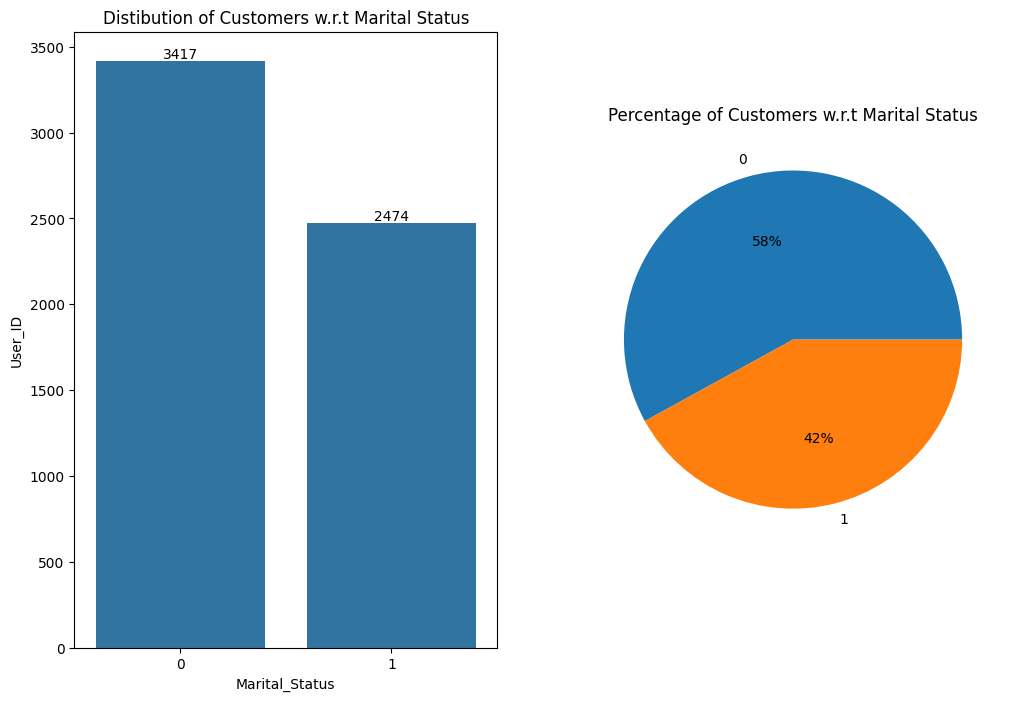

In [29]:
plt.figure(figsize=(12,8))
df_marital=df.groupby('Marital_Status')['User_ID'].nunique()
plt.subplot(1,2,1)
ax=sns.barplot(df_marital)
ax.bar_label(ax.containers[0])
plt.title("Distibution of Customers w.r.t Marital Status")
plt.subplot(1,2,2)
plt.pie(df_marital,labels=df_marital.index,autopct="%.0f%%")
plt.title("Percentage of Customers w.r.t Marital Status")
plt.show()

58% of the customers are not married and 42% if the customers are married. Most of the customers are not married.

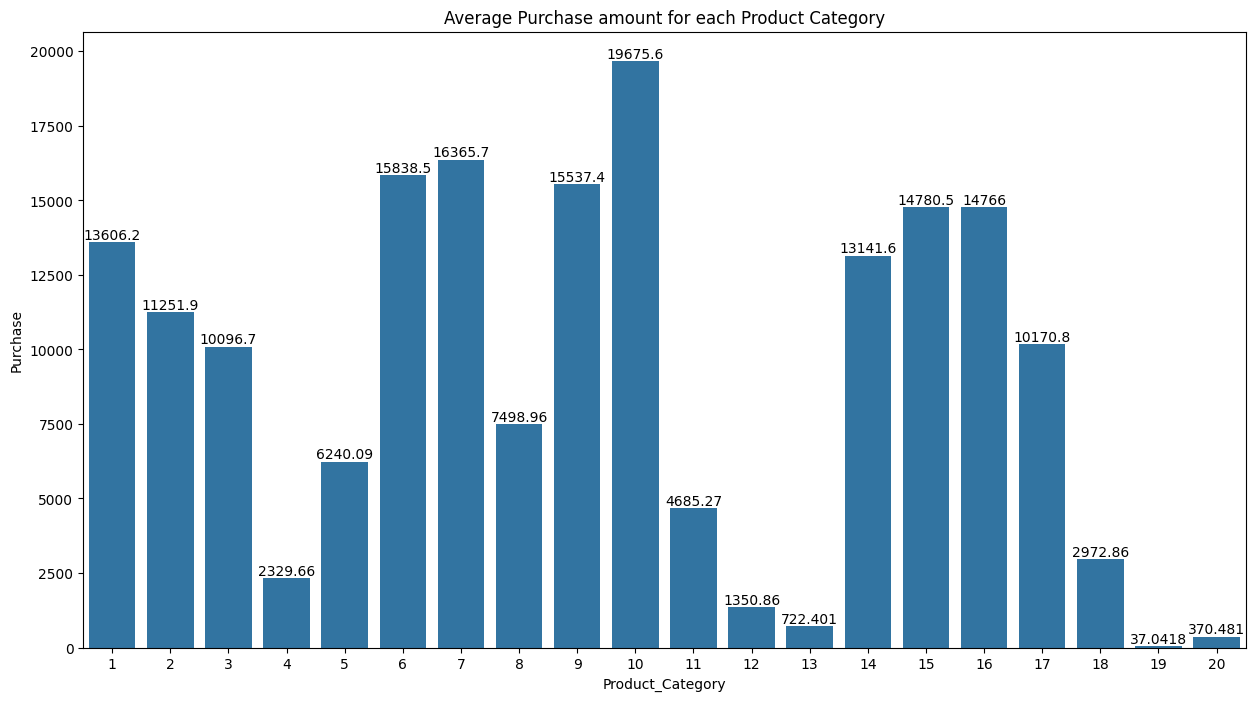

In [32]:
plt.figure(figsize=(15,8))
prod_avg=df.groupby('Product_Category')['Purchase'].mean().reset_index()
ax=sns.barplot(data=prod_avg,x='Product_Category',y='Purchase')
ax.bar_label(ax.containers[0])
plt.title("Average Purchase amount for each Product Category")
plt.show()

Product category "10" has the most average purchase amount of 19675.57 dollars, followed by category "7" with 16365.69 dollars. Product category "19" has the least average Purchase amount of 37.04 dollars.

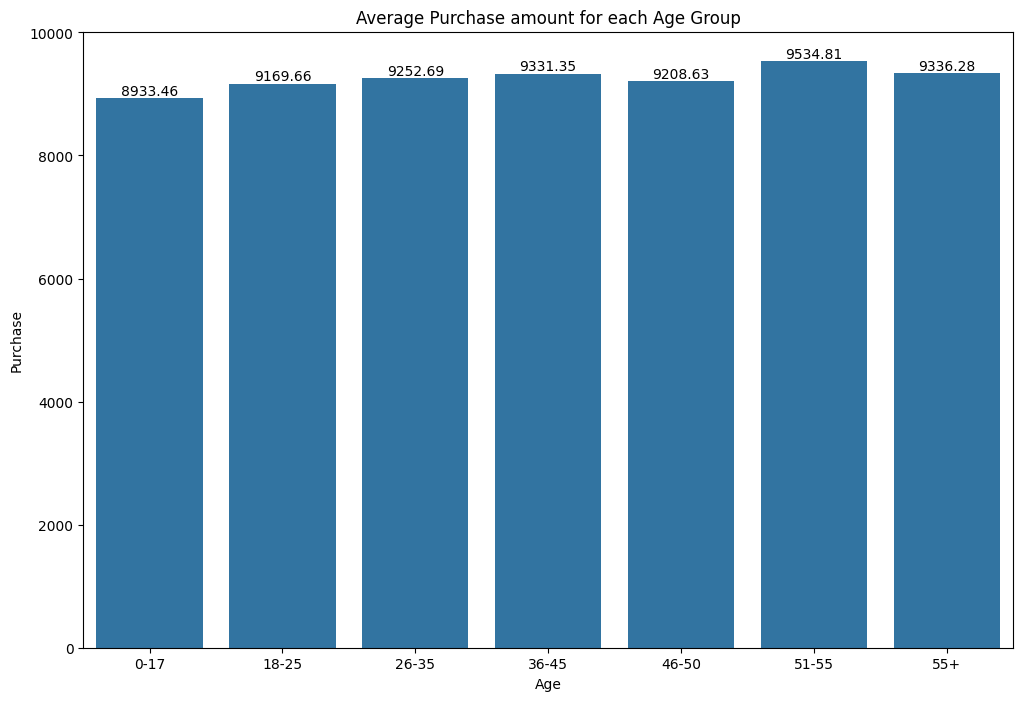

In [34]:
plt.figure(figsize=(12,8))
age_purchase=df.groupby('Age')['Purchase'].mean()
ax=sns.barplot(age_purchase)
ax.bar_label(ax.containers[0])
plt.title("Average Purchase amount for each Age Group")
plt.show()

The average purchase amount for each age group tend to be very similar to each other, with age group 51 to 55 having the most average purchase amount of 9534.81 dollars and age group 0 to 17 having least average purchase amount of 8933.46 dollars.

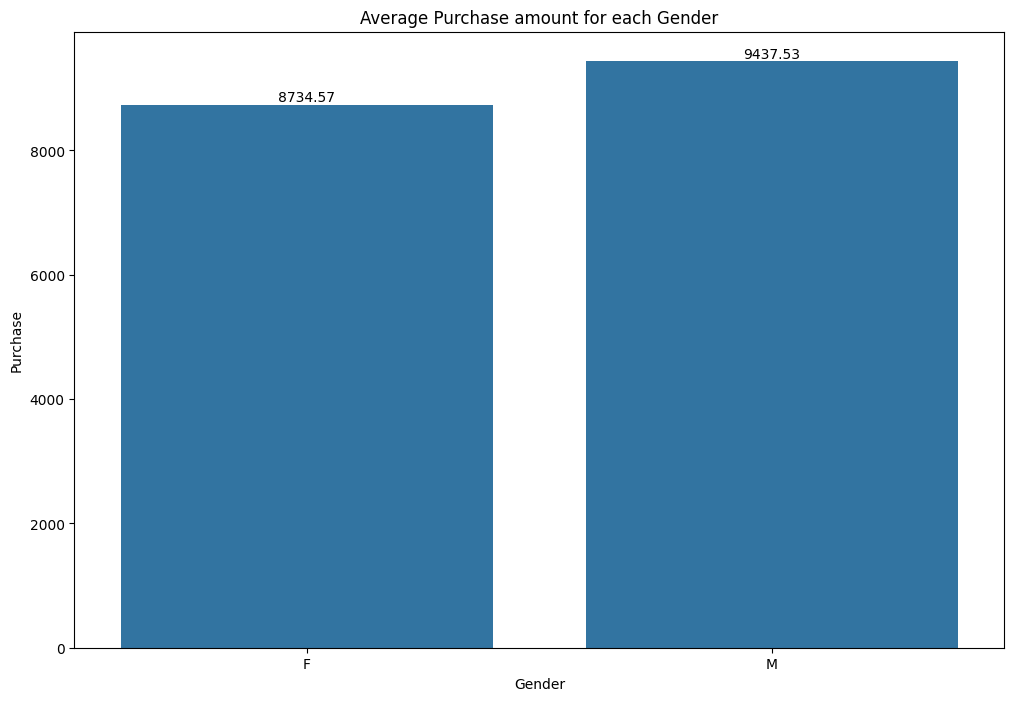

In [36]:
plt.figure(figsize=(12,8))
Gender_purchase=df.groupby('Gender')['Purchase'].mean()
ax=sns.barplot(Gender_purchase)
ax.bar_label(ax.containers[0])
plt.title("Average Purchase amount for each Gender")
plt.show()

The average purchase amount for Females from the Sample tend to be 8734.57 dollars, and for males from the sample tend to be 9437.53 dollars.

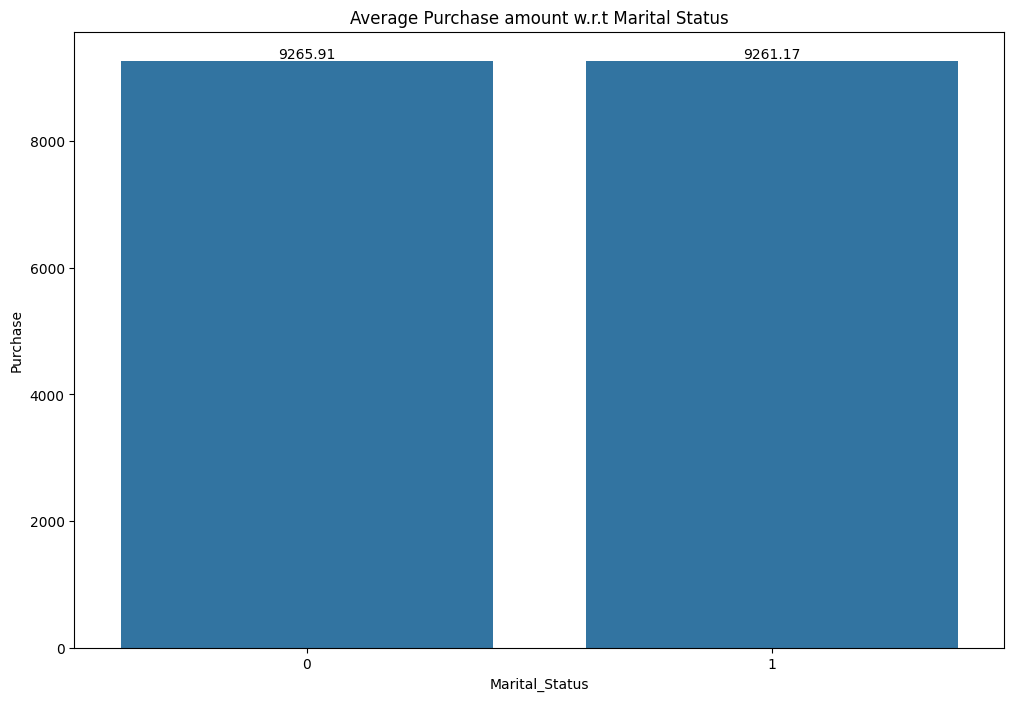

In [38]:
plt.figure(figsize=(12,8))
Marital_purchase=df.groupby('Marital_Status')['Purchase'].mean()
plt.title("Average Purchase amount w.r.t Marital Status")
ax=sns.barplot(Marital_purchase)
ax.bar_label(ax.containers[0])
plt.show()

The average Purchase amount tend to be very similar for both the categories, Married People tend to spend an average of 9261.17 dollars and Unmarried People tend to spend an average of 9265.91 dollars.

**How does gender affect the amount spent?**

In [39]:
m=df[df['Gender']=='M']['Purchase']
f=df[df['Gender']=='F']['Purchase']
print("The mean Purchase amount for Males from the given data is :", round(m.mean(),2))
print("The mean Purchase amount for Females from the given data is :", round(f.mean(),2))

The mean Purchase amount for Males from the given data is : 9437.53
The mean Purchase amount for Females from the given data is : 8734.57


In [ ]:
np.mean(m.sample(1000))

9596.943

In [ ]:
#Attempting CTL on Male and Female samples with the sample size of the existing sample
m_s=[np.mean(m.sample(len(m))) for i in range(1000)]
f_s=[np.mean(f.sample(len(f))) for i in range(1000)]

<Axes: ylabel='Count'>

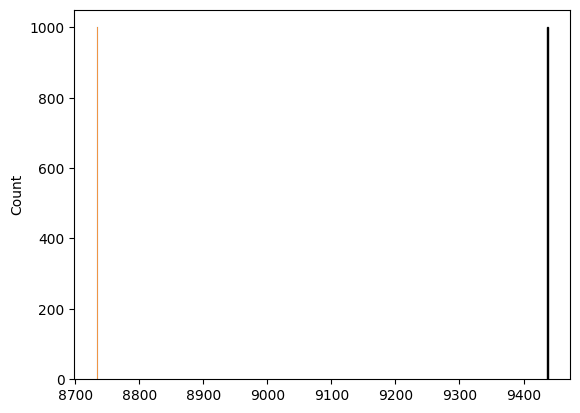

In [ ]:
sns.histplot(x=m_s)
sns.histplot(x=f_s)

Taking Mean values by keeping the sample size as the size of the existing sample will provide us with only 1 mean value, as random samples from the data of sample size of the data will replicate the same data in all samples.

<Axes: ylabel='Count'>

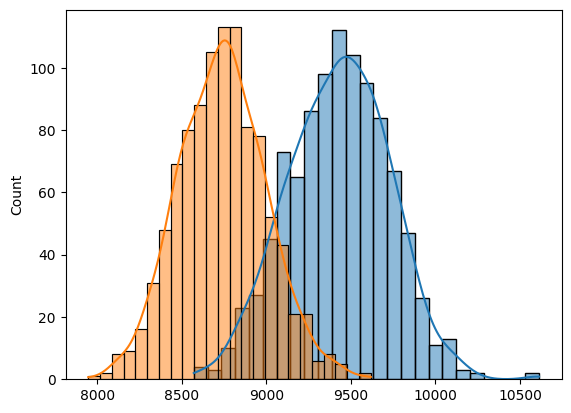

In [ ]:
#Attempting CTL on Male and Female samples with the sample size of 300
n1=300
m_s300=[np.mean(m.sample(n1)) for i in range(1000)]
f_s300=[np.mean(f.sample(n1)) for i in range(1000)]
sns.histplot(x=m_s300,kde=True)
sns.histplot(x=f_s300,kde=True)

In [ ]:
def clt(x,n):
  sde=x.std()/np.sqrt(n)
  print("With 95% confidence interval, the average spending of the person will be in range",[round(x.mean()-1.96*sde,2),round(x.mean()+1.96*sde,2)])
clt(m,n1)
clt(f,n1)

With 95% confidence interval, the average spending of the person will be in range [8861.29, 10013.76]
With 95% confidence interval, the average spending of the person will be in range [8195.1, 9274.03]


Given the sample size as 300, the average spending of Males lie in range of 8861.29 dollars and 10,013.76 dollars with 95% confidence and the average spending of Females lie in range of 8195.1 dollars and 9274.03 dollars with 95% confidence.

<Axes: ylabel='Count'>

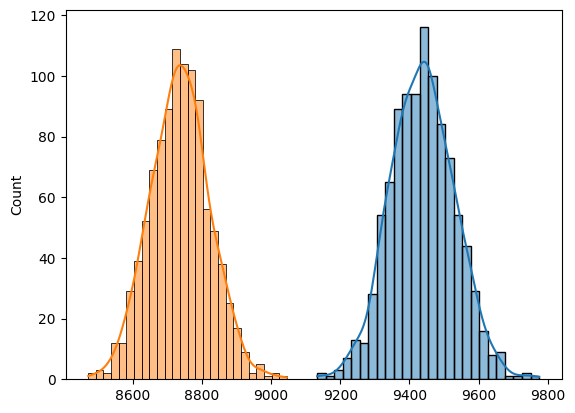

In [ ]:
#Attempting CTL on Male and Female samples with the sample size of 3000
n2=3000
m_s3000=[np.mean(m.sample(n2)) for i in range(1000)]
f_s3000=[np.mean(f.sample(n2)) for i in range(1000)]
sns.histplot(x=m_s3000,kde=True)
sns.histplot(x=f_s3000,kde=True)

In [ ]:
clt(m,n2)
clt(f,n2)

With 95% confidence interval, the average spending of the person will be in range [9255.3, 9619.75]
With 95% confidence interval, the average spending of the person will be in range [8563.97, 8905.16]


Given the sample size as 3000, the average spending of Males lie in range of 9255.3 dollars and 9619.75 dollars with 95% confidence and the average spending of Females lie in range of 8563.97 dollars and 8905.16 dollars with 95% confidence.
Since the normal curves are not overlapping with each other, we can infer Males spend more than Females.

<Axes: ylabel='Count'>

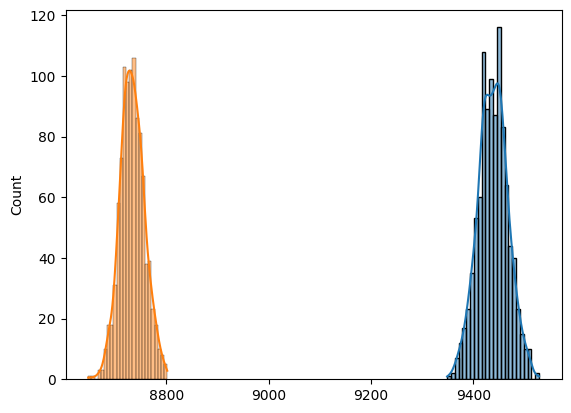

In [ ]:
#Attempting CTL on Male and Female samples with the sample size of 30000
n3=30000
m_s30000=[np.mean(m.sample(n3)) for i in range(1000)]
f_s30000=[np.mean(f.sample(n3)) for i in range(1000)]
sns.histplot(x=m_s30000,kde=True)
sns.histplot(x=f_s30000,kde=True)

In [ ]:
clt(m,n3)
clt(f,n3)

With 95% confidence interval, the average spending of the person will be in range [9379.9, 9495.15]
With 95% confidence interval, the average spending of the person will be in range [8680.62, 8788.51]


Given the sample size as 30000, the average spending of Males lie in range of 9379.9 dollars and 9495.15 dollars with 95% confidence and the average spending of Females lie in range of 8680.62 dollars and 8788.51 dollars with 95% confidence.

The higher the sample size, the variance of the CLT curve reduces, making the ranges of values smaller and smaller.
The ranges of average values with higher sample sizes are nothing but subset of the ranges of average values of lower sample sizes.

Through this analysis, we can clearly notice the expenditure of males are higher than that of females in the dataset.

**How does Marital Status affect the amount spent?**

In [ ]:
ma=df[df['Marital_Status']==1]['Purchase']
unma=df[df['Marital_Status']==0]['Purchase']
print("The mean Purchase amount for Married people from the given data is :", round(ma.mean(),2))
print("The mean Purchase amount for Unmarried people from the given data is :", round(unma.mean(),2))

The mean Purchase amount for Married people from the given data is : 9261.17
The mean Purchase amount for Unmarried people from the given data is : 9265.91


<Axes: ylabel='Count'>

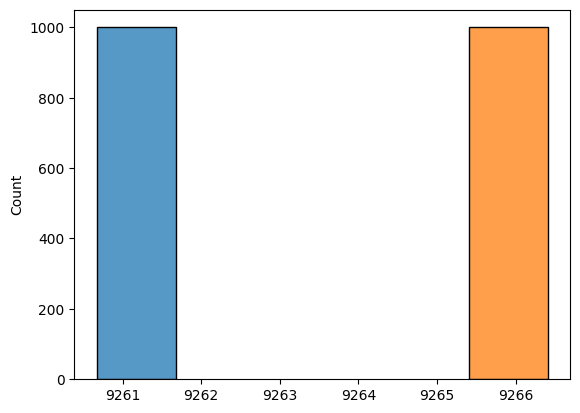

In [ ]:
#Attempting CTL on Married and Unmarried people purchase samples with the sample size of the existing sample
ma_s=[np.mean(ma.sample(len(ma))) for i in range(1000)]
unma_s=[np.mean(unma.sample(len(unma))) for i in range(1000)]
sns.histplot(x=ma_s)
sns.histplot(x=unma_s)

<Axes: ylabel='Count'>

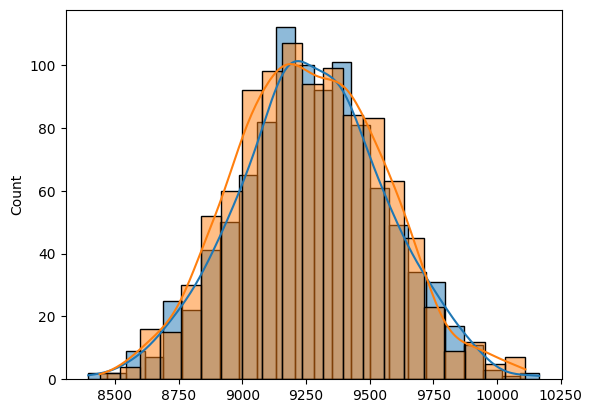

In [ ]:
#Attempting CTL on Married and Unmarried people purchase samples with the sample size of 300
ma_s300=[np.mean(ma.sample(n1)) for i in range(1000)]
unma_s300=[np.mean(unma.sample(n1)) for i in range(1000)]
sns.histplot(x=ma_s300,kde=True)
sns.histplot(x=unma_s300,kde=True)

In [ ]:
clt(ma,n1)
clt(unma,n1)

With 95% confidence interval, the average spending of the person will be in range [8693.46, 9828.89]
With 95% confidence interval, the average spending of the person will be in range [8697.01, 9834.81]


Given the sample size as 300, the average spending of Married people lie in range of 8693.46 dollars and 9828.89 dollars with 95% confidence and the average spending of Unmarried people lie in range of 8697.01 dollars and 9834.81 dollars with 95% confidence.

<Axes: ylabel='Count'>

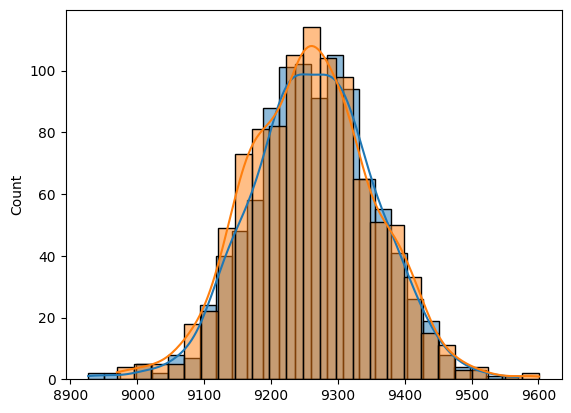

In [ ]:
#Attempting CTL on Married and Unmarried people purchase samples with the sample size of 3000
ma_s3000=[np.mean(ma.sample(n2)) for i in range(1000)]
unma_s3000=[np.mean(unma.sample(n2)) for i in range(1000)]
sns.histplot(x=ma_s3000,kde=True)
sns.histplot(x=unma_s3000,kde=True)

In [ ]:
clt(ma,n2)
clt(unma,n2)

With 95% confidence interval, the average spending of the person will be in range [9081.65, 9440.7]
With 95% confidence interval, the average spending of the person will be in range [9086.01, 9445.81]


Given the sample size as 3000, the average spending of Married people lie in range of 9081.65 dollars and 9440.7 dollars with 95% confidence and the average spending of Unmarried people lie in range of 9086.01 dollars and 9445.81 dollars with 95% confidence.

<Axes: ylabel='Count'>

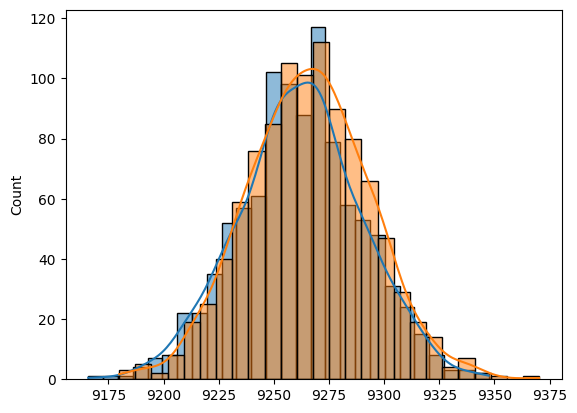

In [ ]:
#Attempting CTL on Married and Unmarried people purchase samples with the sample size of 30000
ma_s30000=[np.mean(ma.sample(n3)) for i in range(1000)]
unma_s30000=[np.mean(unma.sample(n3)) for i in range(1000)]
sns.histplot(x=ma_s30000,kde=True)
sns.histplot(x=unma_s30000,kde=True)

In [ ]:
clt(ma,n3)
clt(unma,n3)

With 95% confidence interval, the average spending of the person will be in range [9204.4, 9317.95]
With 95% confidence interval, the average spending of the person will be in range [9209.02, 9322.8]


Given the sample size as 30000, the average spending of Married people lie in range of 9204.4 dollars and 9317.95 dollars with 95% confidence and the average spending of Unmarried people lie in range of 9209.02 dollars and 9322.8 dollars with 95% confidence.

The higher the sample size, the variance of the CLT curve reduces, making the ranges of values smaller and smaller.
The ranges of average values with higher sample sizes are nothing but subset of the ranges of average values of lower sample sizes.

Through this analysis, we can clearly notice that the expenditure of Married People and Unmarried people are very similar to each other and the effect of marital status in purchase is minimalistic.

**How does Age affect the amount spent?**

In [ ]:
age_1=df[df['Age']=='0-17']['Purchase']
age_2=df[df['Age']=='18-25']['Purchase']
age_3=df[df['Age']=='26-35']['Purchase']
age_4=df[df['Age']=='36-45']['Purchase']
age_5=df[df['Age']=='46-50']['Purchase']
age_6=df[df['Age']=='51-55']['Purchase']
age_7=df[df['Age']=='55+']['Purchase']
print("The mean Purchase amount for people in age group of 0 to 17 from the given data is :", round(age_1.mean(),2))
print("The mean Purchase amount for people in age group of 18 to 25 from the given data is :", round(age_2.mean(),2))
print("The mean Purchase amount for people in age group of 26 to 35 from the given data is :", round(age_3.mean(),2))
print("The mean Purchase amount for people in age group of 36 to 45 from the given data is :", round(age_4.mean(),2))
print("The mean Purchase amount for people in age group of 46 to 50 from the given data is :", round(age_5.mean(),2))
print("The mean Purchase amount for people in age group of 51 to 55 from the given data is :", round(age_6.mean(),2))
print("The mean Purchase amount for people in age group of above 55 from the given data is :", round(age_7.mean(),2))

The mean Purchase amount for people in age group of 0 to 17 from the given data is : 8933.46
The mean Purchase amount for people in age group of 18 to 25 from the given data is : 9169.66
The mean Purchase amount for people in age group of 26 to 35 from the given data is : 9252.69
The mean Purchase amount for people in age group of 36 to 45 from the given data is : 9331.35
The mean Purchase amount for people in age group of 46 to 50 from the given data is : 9208.63
The mean Purchase amount for people in age group of 51 to 55 from the given data is : 9534.81
The mean Purchase amount for people in age group of above 55 from the given data is : 9336.28


In [ ]:
#Attempting CTL on Different Age Groups purchase samples with the sample size of the existing sample
age_1s=[np.mean(age_1.sample(len(age_1))) for i in range(1000)]
age_2s=[np.mean(age_2.sample(len(age_2))) for i in range(1000)]
age_3s=[np.mean(age_3.sample(len(age_3))) for i in range(1000)]
age_4s=[np.mean(age_4.sample(len(age_4))) for i in range(1000)]
age_5s=[np.mean(age_5.sample(len(age_5))) for i in range(1000)]
age_6s=[np.mean(age_6.sample(len(age_6))) for i in range(1000)]
age_7s=[np.mean(age_7.sample(len(age_7))) for i in range(1000)]

<Axes: ylabel='Count'>

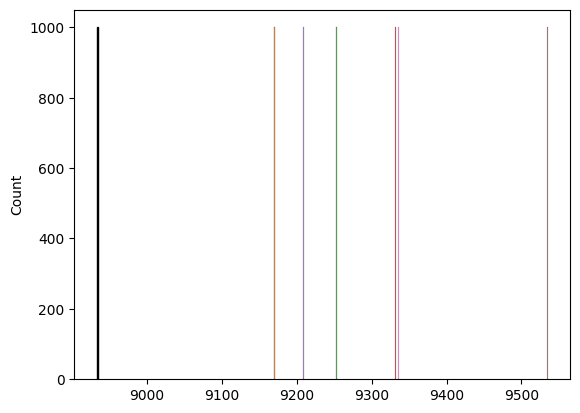

In [ ]:
sns.histplot(x=age_1s)
sns.histplot(x=age_2s)
sns.histplot(x=age_3s)
sns.histplot(x=age_4s)
sns.histplot(x=age_5s)
sns.histplot(x=age_6s)
sns.histplot(x=age_7s)

In [ ]:
#Attempting CTL on Different Age Groups purchase samples with the sample size of 300
age_1s300=[np.mean(age_1.sample(n1)) for i in range(1000)]
age_2s300=[np.mean(age_2.sample(n1)) for i in range(1000)]
age_3s300=[np.mean(age_3.sample(n1)) for i in range(1000)]
age_4s300=[np.mean(age_4.sample(n1)) for i in range(1000)]
age_5s300=[np.mean(age_5.sample(n1)) for i in range(1000)]
age_6s300=[np.mean(age_6.sample(n1)) for i in range(1000)]
age_7s300=[np.mean(age_7.sample(n1)) for i in range(1000)]

<Axes: ylabel='Count'>

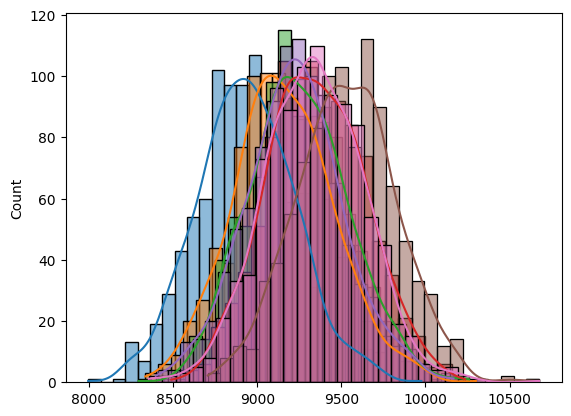

In [ ]:
sns.histplot(x=age_1s300,kde=True)
sns.histplot(x=age_2s300,kde=True)
sns.histplot(x=age_3s300,kde=True)
sns.histplot(x=age_4s300,kde=True)
sns.histplot(x=age_5s300,kde=True)
sns.histplot(x=age_6s300,kde=True)
sns.histplot(x=age_7s300,kde=True)

In [ ]:
clt(age_1,n1)
clt(age_2,n1)
clt(age_3,n1)
clt(age_4,n1)
clt(age_5,n1)
clt(age_6,n1)
clt(age_7,n1)

With 95% confidence interval, the average spending of the person will be in range [8355.09, 9511.84]
With 95% confidence interval, the average spending of the person will be in range [8599.98, 9739.35]
With 95% confidence interval, the average spending of the person will be in range [8685.7, 9819.69]
With 95% confidence interval, the average spending of the person will be in range [8762.95, 9899.75]
With 95% confidence interval, the average spending of the person will be in range [8646.53, 9770.72]
With 95% confidence interval, the average spending of the person will be in range [8959.12, 10110.5]
With 95% confidence interval, the average spending of the person will be in range [8769.18, 9903.38]


Given the sample size as 300,

the average spending of people in age group of 0 to 17 lie in range of 8355.09 dollars to 9511.84 dollars with 95% confidence

the average spending of people in age group of 18 to 25 lie in range of 8599.98 dollars to 9739.35 dollars with 95% confidence

the average spending of people in age group of 26 to 35 lie in range of 8685.7 dollars to 9819.69 dollars with 95% confidence

the average spending of people in age group of 36 to 45 lie in range of 8762.95 dollars to 9899.75 dollars with 95% confidence

the average spending of people in age group of 46 to 50 lie in range of 8646.53 dollars to 9770.72 dollars with 95% confidence

the average spending of people in age group of 51 to 55 lie in range of 8959.12 dollars to 10110.5 dollars with 95% confidence

the average spending of people in age group of 51 to 55 lie in range of 8769.18 dollars to 9903.38 dollars with 95% confidence

In [ ]:
#Attempting CTL on Different Age Groups purchase samples with the sample size of 3000
age_1s3000=[np.mean(age_1.sample(n2)) for i in range(1000)]
age_2s3000=[np.mean(age_2.sample(n2)) for i in range(1000)]
age_3s3000=[np.mean(age_3.sample(n2)) for i in range(1000)]
age_4s3000=[np.mean(age_4.sample(n2)) for i in range(1000)]
age_5s3000=[np.mean(age_5.sample(n2)) for i in range(1000)]
age_6s3000=[np.mean(age_6.sample(n2)) for i in range(1000)]
age_7s3000=[np.mean(age_7.sample(n2)) for i in range(1000)]

<Axes: ylabel='Count'>

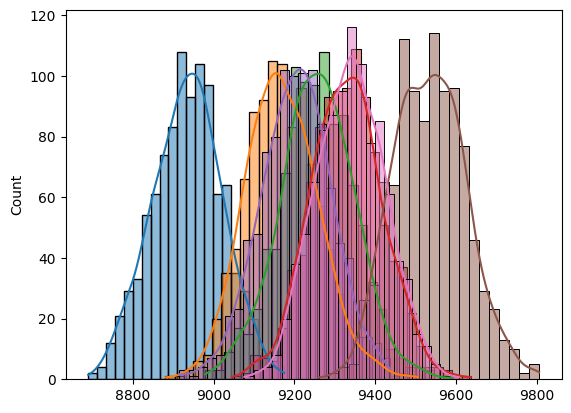

In [ ]:
sns.histplot(x=age_1s3000,kde=True)
sns.histplot(x=age_2s3000,kde=True)
sns.histplot(x=age_3s3000,kde=True)
sns.histplot(x=age_4s3000,kde=True)
sns.histplot(x=age_5s3000,kde=True)
sns.histplot(x=age_6s3000,kde=True)
sns.histplot(x=age_7s3000,kde=True)

In [ ]:
clt(age_1,n2)
clt(age_2,n2)
clt(age_3,n2)
clt(age_4,n2)
clt(age_5,n2)
clt(age_6,n2)
clt(age_7,n2)

With 95% confidence interval, the average spending of the person will be in range [8750.57, 9116.36]
With 95% confidence interval, the average spending of the person will be in range [8989.51, 9349.81]
With 95% confidence interval, the average spending of the person will be in range [9073.39, 9431.99]
With 95% confidence interval, the average spending of the person will be in range [9151.61, 9511.09]
With 95% confidence interval, the average spending of the person will be in range [9030.88, 9386.38]
With 95% confidence interval, the average spending of the person will be in range [9352.76, 9716.86]
With 95% confidence interval, the average spending of the person will be in range [9156.95, 9515.61]


Given the sample size as 3000,

the average spending of people in age group of 0 to 17 lie in range of 8750.57 dollars to 9116.36 dollars with 95% confidence

the average spending of people in age group of 18 to 25 lie in range of 8989.51 dollars to 9349.81 dollars with 95% confidence

the average spending of people in age group of 26 to 35 lie in range of 9073.39 dollars to 9431.99 dollars with 95% confidence

the average spending of people in age group of 36 to 45 lie in range of 9151.61 dollars to 9511.09 dollars with 95% confidence

the average spending of people in age group of 46 to 50 lie in range of 9030.88 dollars to 9386.38 dollars with 95% confidence

the average spending of people in age group of 51 to 55 lie in range of 9352.76 dollars to 9716.86 dollars with 95% confidence

the average spending of people in age group of 51 to 55 lie in range of 9156.95 dollars to 9515.61 dollars with 95% confidence

Overall, People in age group of 51 to 55 tend to be spending more on average compared to other age group people, and People in age group of 0 to 17 tend to spending less compared to other age group people. And since both the curves are not overlapping with eachother, we can infer people in age group of 51 to 55 spend more than people in age group 0 to 17.

And with 95% confidence, we can say that people in age group of 51 to 55 spend more than people in age group of 18 to 25.

In [ ]:
#Since 30000 exceeds the actual sample size of the data, we are unable to sample 30000 random data for our analysis on age groups

**Recommendations and Actionable Insights**

Most of the unique customers purchased in the Black Friday were Men, and through CLT, we can clearly Infer that the Average Purchase amount for Men is significantly more than that of Females. Most of the unique customers were also tend to lie in age group of 26 to 35, but despite of having way lesser unique customers in age group of 51 to 55, People from Age group of 51 to 55 on an Average tend to significantly spend higher than people in age group of 0 to 17 and people in age group of 18 to 25. Most of the customers were also from Category C Cities and Marital Status doesn’t seem to have any effects on Purchase amount.

1. Since more unique customers are men, and they spend significantly more than females, Walmart can target Male customers in the Black Friday Sales through Gender Specific Marketting and Offers to leverage its customer base and their spending

2. Since most of the customers fall in age group of 26 to 35, Walmart can develop marketing strategies that appeal to this demographic, such as trendy products, tech gadgets, fashion items, and other interests common in this age group. Although there are fewer customers in the 51-55 age group, they tend to spend more on average, so Walmart can target this Demographic in marketing campaigns and can provide more premium products to this Demographic in the market.

3. Since marital status does not significantly affect purchase amounts, Walmart can avoid segmenting marketing strategies based on this criterion.

4. As most of the Customers are from Category C Cities, region specific Marketing strategies can be adopted to improve the sales in Category C cities.